# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
!pip install -q kaggle
!pip install numpy==1.23.5 pandas==1.5.3 matplotlib==3.7.1 --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 146.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 207.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [pandas]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mxnet 1.9.1 requires numpy<2.0.0,>1.16.0, but you have numpy 2.0.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
panel 1.7.1 requires bokeh<3.8.0,>=3.5.0, but you have bokeh 2.0.1 which is incompatible.
holoviews 1.20.2 requires bokeh>=

### Setup Kaggle API Key

In [2]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
import json

kaggle_username = "janaalbader"
kaggle_key = "b095b156de2ac43c0dbe445b4fac5d24"

# Save API token to the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))


### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [4]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip


bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [5]:
import pandas as pd
import numpy as np
from autogluon.tabular import TabularPredictor
import matplotlib.pyplot as plt

In [6]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe(include='all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


In [8]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv')
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [9]:
# Same thing as train and test dataset
submission =  pd.read_csv('sampleSubmission.csv')
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset.
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [10]:
train["count"] = np.log1p(train["count"])

predictor = TabularPredictor(label="count", eval_metric="root_mean_squared_error").fit(
    train_data=train.drop(columns=["datetime", "casual", "registered"]),
    time_limit=600,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20250609_145606"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       11.60 GB / 12.67 GB (91.5%)
Disk Space Avail:   66.41 GB / 107.72 GB (61.7%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

(_ray_fit pid=2245) [1000]	valid_set's rmse: 1.12412
(_ray_fit pid=2389) [1000]	valid_set's rmse: 1.18026 [repeated 4x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)
(_ray_fit pid=2495) [1000]	valid_set's rmse: 1.14735
(_ray_fit pid=2495) [2000]	valid_set's rmse: 1.14687
(_ray_fit pid=2546) [2000]	valid_set's rmse: 1.14126 [repeated 2x across cluster]
(_ray_fit pid=2599) [3000]	valid_set's rmse: 1.17554 [repeated 7x across cluster]


(_dystack pid=2045) 	-1.1495	 = Validation score   (-root_mean_squared_error)
(_dystack pid=2045) 	47.32s	 = Training   runtime
(_dystack pid=2045) 	4.07s	 = Validation runtime
(_dystack pid=2045) Fitting model: LightGBM_BAG_L1 ... Training model for up to 36.63s of the 83.49s of remaining time.
(_dystack pid=2045) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.07%)
(_dystack pid=2045) 	-1.1389	 = Validation score   (-root_mean_squared_error)
(_dystack pid=2045) 	26.58s	 = Training   runtime
(_dystack pid=2045) 	0.63s	 = Validation runtime
(_dystack pid=2045) Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 6.28s of the 53.14s of remaining time.
(_dystack pid=2045) /usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function bec

### Review AutoGluon's training run with ranking of models that did the best.



In [11]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -1.094642  root_mean_squared_error      12.467044  382.742468                0.000935           0.038783            3       True         13
1   RandomForestMSE_BAG_L2  -1.101593  root_mean_squared_error      11.857332  325.554518                0.972436          46.613122            2       True         12
2        LightGBMXT_BAG_L2  -1.102189  root_mean_squared_error      11.276727  307.679923                0.391832          28.738526            2       True         10
3          LightGBM_BAG_L2  -1.104009  root_mean_squared_error      11.101841  307.352038                0.216946          28.410641            2       True         11
4      WeightedEnsemble_L2  -1.107050  root_mean_squared_error      10.021531  268.293707         

/usr/local/lib/python3.11/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -1.2545882337850955,
  'KNeighborsDist_BAG_L1': -1.3119991695435524,
  'LightGBMXT_BAG_L1': -1.1478595610765583,
  'LightGBM_BAG_L1': -1.1365170764081598,
  'RandomForestMSE_BAG_L1': -1.1648957827158448,
  'CatBoost_BAG_L1': -1.1345185795295

### Create predictions from test dataset

In [12]:
test_features = test.drop(columns=["datetime"])
predictions = predictor.predict(test_features)
predictions = np.expm1(predictions)

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [13]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

,count
count,6493.000000
mean,133.026443
std,109.315460
min,4.393308
25%,46.964241
50%,92.907181
75%,205.338760
max,592.075439


In [14]:
# How many negative values do we have?
(predictions < 0).sum()

0

In [15]:
# Set them to zero
predictions[predictions < 0] = 0

### Set predictions to submission dataframe, save, and submit

In [16]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [17]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 260kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [18]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                        description                                   status                     publicScore  privateScore  
--------------  --------------------------  --------------------------------------------  -------------------------  -----------  ------------  
submission.csv  2025-06-09 15:06:47.407000  first raw submission                          SubmissionStatus.COMPLETE  1.21232      1.21232       
submission.csv  2025-06-08 19:00:13.407000  My final submission                           SubmissionStatus.COMPLETE  0.42042      0.42042       
submission.csv  2025-06-08 14:14:35.317000  Notebook Bike Sharing Demand (1) | Version 4  SubmissionStatus.COMPLETE  0.41999      0.41999       
submission.csv  2025-06-08 13:50:01.663000  Notebook Bike Sharing Demand (1) | Version 2  SubmissionStatus.COMPLETE  0.48590      0.48590       


#### Initial score of `1.21232`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

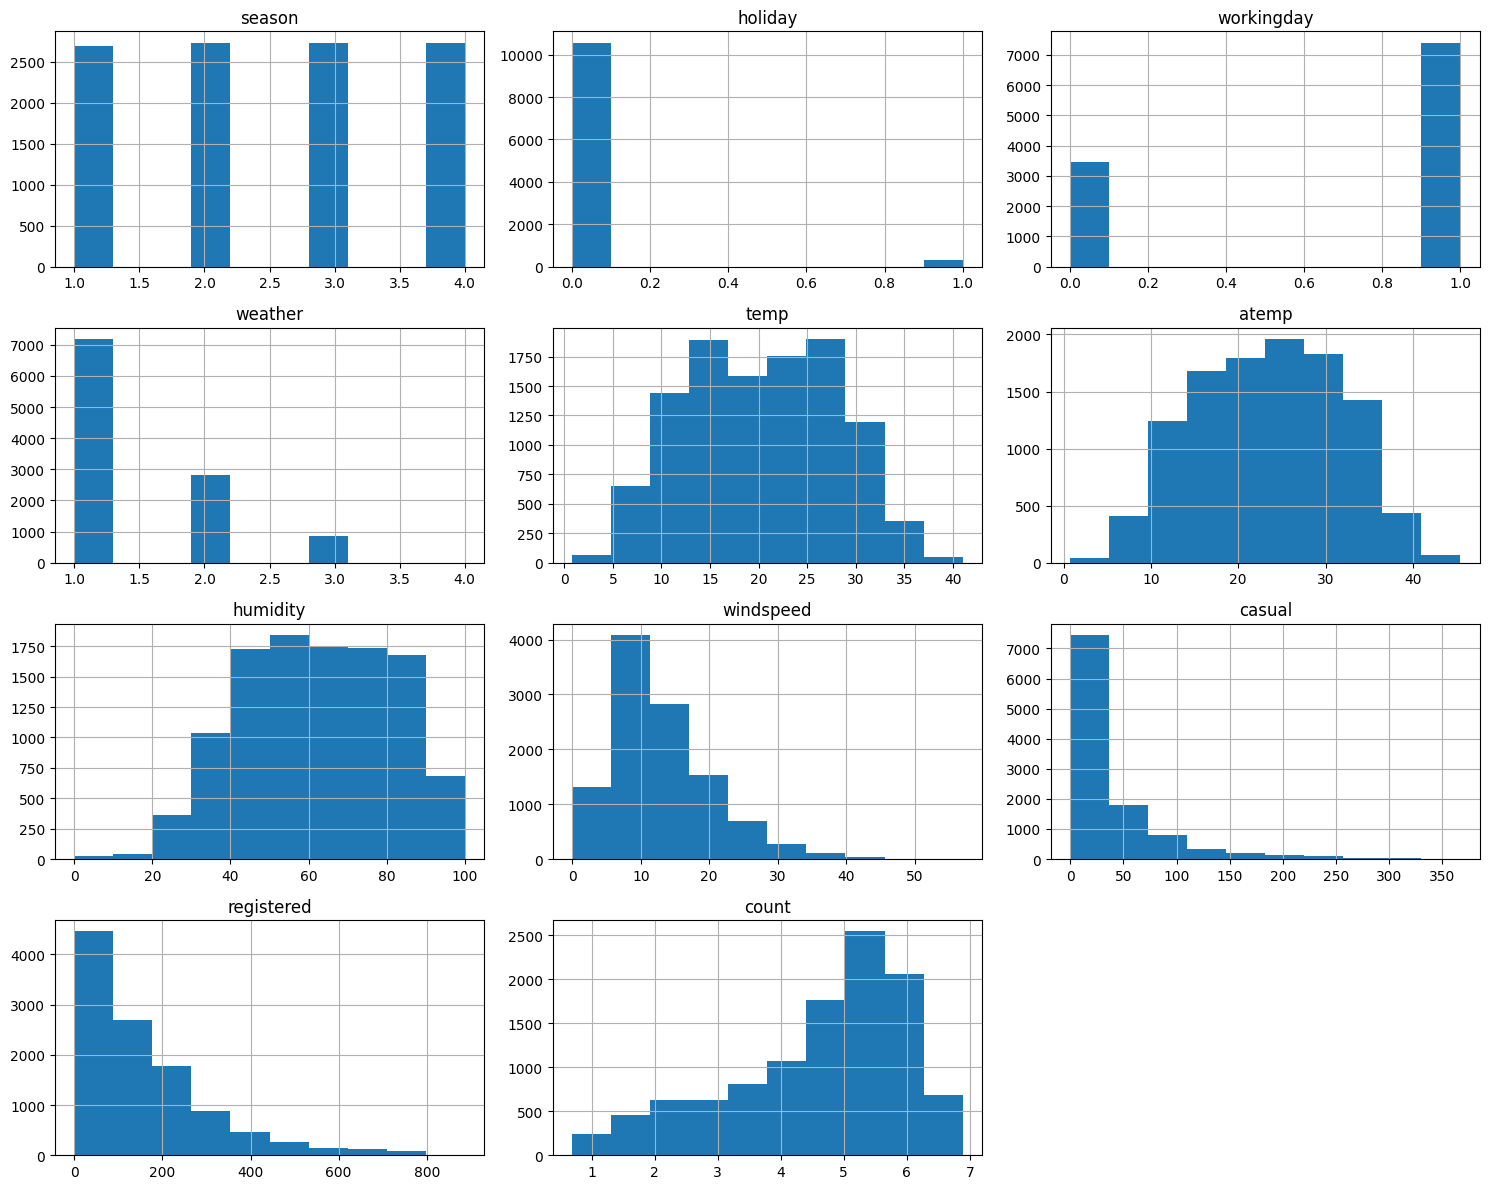

In [19]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(15,12))
plt.tight_layout()
plt.show()

In [20]:
# create a new feature
train["datetime"] = pd.to_datetime(train["datetime"])
test["datetime"] = pd.to_datetime(test["datetime"])

# Extract hour
train["hour"] = train["datetime"].dt.hour
test["hour"] = test["datetime"].dt.hour

# Feature: Time of Day Category
def time_of_day(hour):
    if 7 <= hour <= 9:
        return "morning_rush"
    elif 11 <= hour <= 13:
        return "lunch"
    elif 17 <= hour <= 18:
        return "evening_rush"
    else:
        return "off_peak"

train["time_of_day"] = train["hour"].apply(time_of_day)
test["time_of_day"] = test["hour"].apply(time_of_day)

# Feature: Temperature Category
def temp_category(temp):
    if temp < 10:
        return "cold"
    elif temp < 25:
        return "mild"
    else:
        return "hot"

train["temp_cat"] = train["temp"].apply(temp_category)
test["temp_cat"] = test["temp"].apply(temp_category)

# Feature: Wind Speed Category
def wind_category(wind):
    if wind < 10:
        return "calm"
    elif wind < 25:
        return "breezy"
    else:
        return "windy"

train["wind_cat"] = train["windspeed"].apply(wind_category)
test["wind_cat"] = test["windspeed"].apply(wind_category)

# Feature: Humidity Category
def humidity_category(hum):
    if hum < 40:
        return "dry"
    elif hum < 70:
        return "moderate"
    else:
        return "humid"

train["humidity_cat"] = train["humidity"].apply(humidity_category)
test["humidity_cat"] = test["humidity"].apply(humidity_category)


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [21]:
# Convert to category
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")
categorical_cols = ["hour", "time_of_day", "temp_cat", "wind_cat", "humidity_cat"]

for col in categorical_cols:
    train[col] = train[col].astype("category")
    test[col] = test[col].astype("category")


In [22]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,time_of_day,temp_cat,wind_cat,humidity_cat
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,2.833213,0,off_peak,cold,calm,humid
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,3.713572,1,off_peak,cold,calm,humid
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,3.496508,2,off_peak,cold,calm,humid
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,2.639057,3,off_peak,cold,calm,humid
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,0.693147,4,off_peak,cold,calm,humid


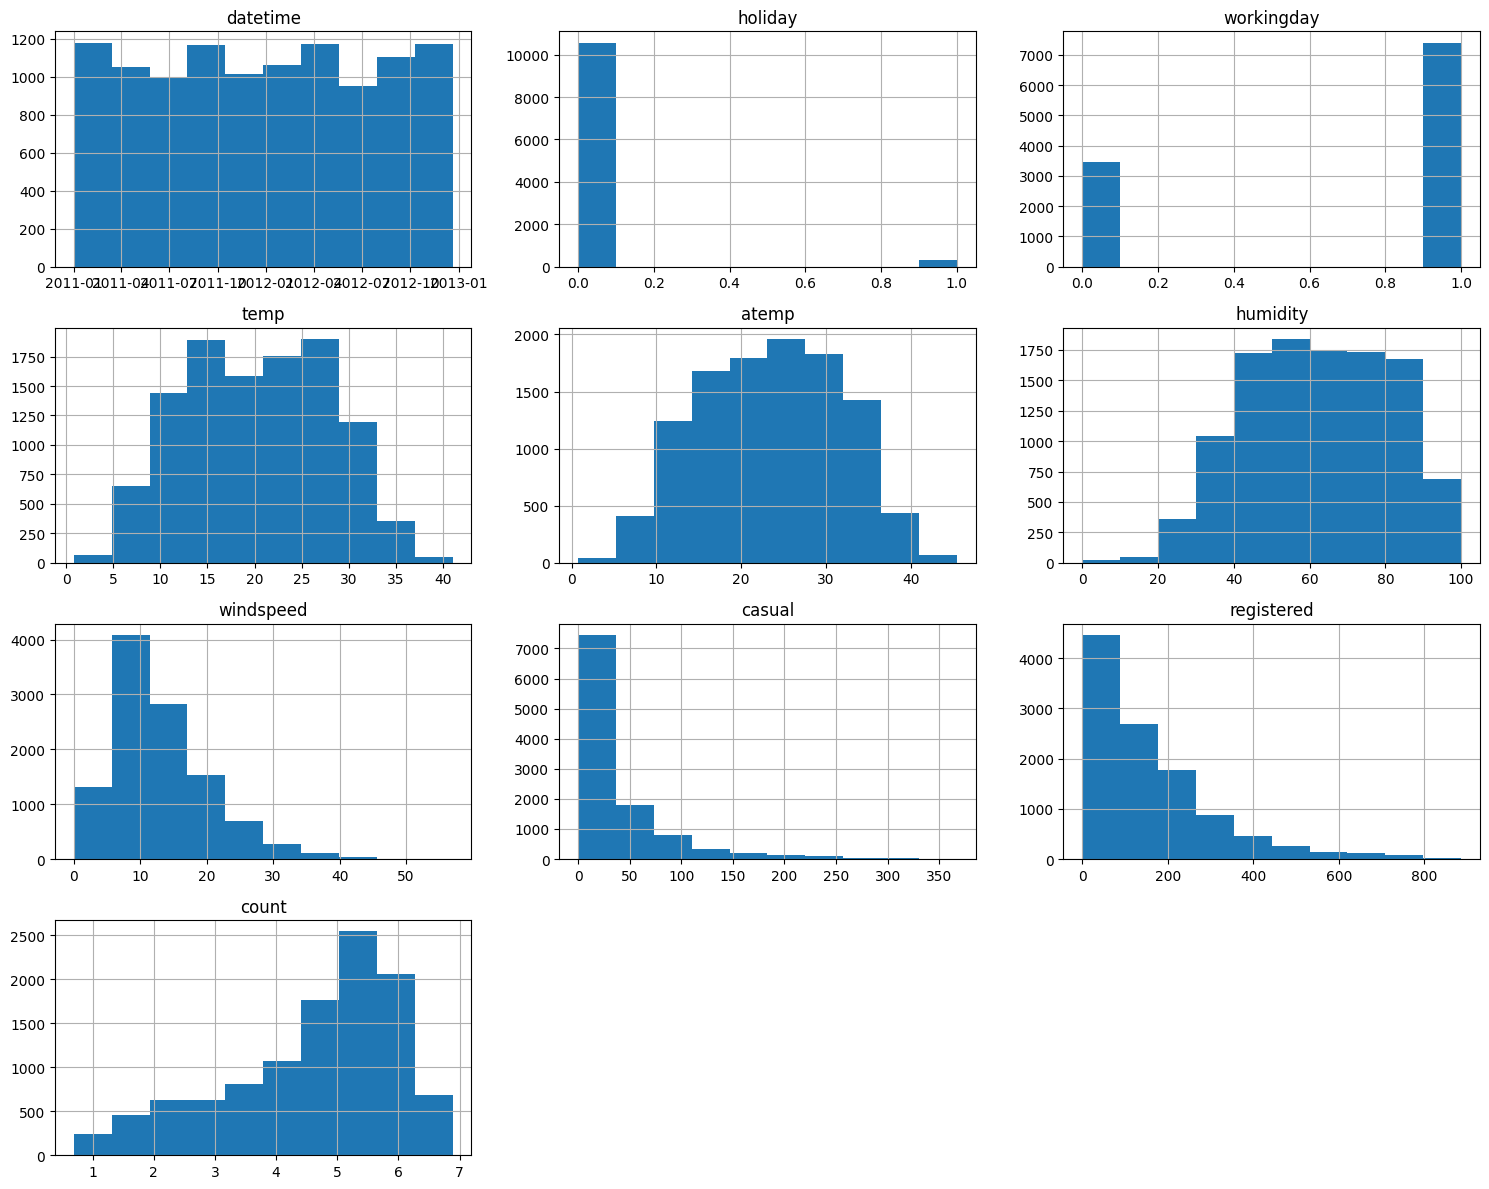

In [23]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(15,12))
plt.tight_layout()
plt.show()

## Step 5: Rerun the model with the same settings as before, just with more features

In [24]:
predictor_new_features = TabularPredictor(label="count", eval_metric="root_mean_squared_error").fit(
    train_data=train.drop(columns=["datetime", "casual", "registered"]),
    time_limit=600,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20250609_150652"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.19 GB / 12.67 GB (80.4%)
Disk Space Avail:   65.55 GB / 107.72 GB (60.9%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

In [25]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -0.372984  root_mean_squared_error       6.595109  333.411362                0.000798           0.029102            3       True         13
1      WeightedEnsemble_L2  -0.373884  root_mean_squared_error       4.855677  246.277541                0.010583           0.073115            2       True          8
2        LightGBMXT_BAG_L1  -0.377202  root_mean_squared_error       2.319722   33.757472                2.319722          33.757472            1       True          3
3          LightGBM_BAG_L2  -0.377932  root_mean_squared_error       5.889785  284.716728                0.161356          28.232280            2       True         10
4        LightGBMXT_BAG_L2  -0.380332  root_mean_squared_error       6.091373  285.310656         

/usr/local/lib/python3.11/dist-packages/autogluon/tabular/predictor/predictor.py:3161: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  plot_tabular_models(


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -1.2908960441022748,
  'KNeighborsDist_BAG_L1': -1.3809761447359183,
  'LightGBMXT_BAG_L1': -0.37720195829610337,
  'LightGBM_BAG_L1': -0.3808970907037338,
  'RandomForestMSE_BAG_L1': -0.40378293781807933,
  'CatBoost_BAG_L1': -0.3929842443507773,
  'Extr

In [26]:
# Remember to set all negative values to zero
predictions_new = predictor_new_features.predict(test.drop(columns=["datetime"]))
predictions_new = np.expm1(predictions_new)
predictions_new[predictions_new < 0] = 0

In [27]:
# Same submitting predictions
submission_new_features = submission.copy()
submission_new_features["count"] = predictions_new
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [28]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:00<00:00, 356kB/s]
Successfully submitted to Bike Sharing Demand

In [29]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                                   status                     publicScore  privateScore  
---------------------------  --------------------------  --------------------------------------------  -------------------------  -----------  ------------  
submission_new_features.csv  2025-06-09 15:17:24.123000  new features                                  SubmissionStatus.COMPLETE  0.43297      0.43297       
submission.csv               2025-06-09 15:06:47.407000  first raw submission                          SubmissionStatus.COMPLETE  1.21232      1.21232       
submission.csv               2025-06-08 19:00:13.407000  My final submission                           SubmissionStatus.COMPLETE  0.42042      0.42042       
submission.csv               2025-06-08 14:14:35.317000  Notebook Bike Sharing Demand (1) | Version 4  SubmissionStatus.COMPLETE  0.41999      0.41999       


#### New Score of 0.43297

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [30]:
predictor_new_hpo = TabularPredictor(label="count", eval_metric="root_mean_squared_error").fit(
    train_data=train.drop(columns=["datetime", "casual", "registered"]),
    time_limit=600,
    presets="best_quality",
    hyperparameters={
        'GBM': {'extra_trees': True, 'ag_args': {'name_suffix': 'XGB'}},
        'CAT': {'iterations': 700},
        'NN_TORCH': {'epochs': 20}
    }
)

No path specified. Models will be saved in: "AutogluonModels/ag-20250609_151725"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.15 GB / 12.67 GB (80.1%)
Disk Space Avail:   64.70 GB / 107.72 GB (60.1%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

In [31]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L3  -0.376595  root_mean_squared_error       2.691049  264.733248                0.001041           0.024580            3       True          6
1  WeightedEnsemble_L2  -0.376606  root_mean_squared_error       2.547186  149.406810                0.001123           0.017575            2       True          3
2   LightGBMXGB_BAG_L1  -0.377202  root_mean_squared_error       2.293498   35.219349                2.293498          35.219349            1       True          1
3      CatBoost_BAG_L2  -0.380786  root_mean_squared_error       2.690009  264.708668                0.143945         115.319432            2       True          5
4   LightGBMXGB_BAG_L2  -0.384317  root_mean_squared_error       2.871594  177.325936                0.325530         

/usr/local/lib/python3.11/dist-packages/autogluon/tabular/predictor/predictor.py:3161: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  plot_tabular_models(


{'model_types': {'LightGBMXGB_BAG_L1': 'StackerEnsembleModel_LGB',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXGB_BAG_L2': 'StackerEnsembleModel_LGB',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBMXGB_BAG_L1': -0.37720195829610337,
  'CatBoost_BAG_L1': -0.40263629889962327,
  'WeightedEnsemble_L2': -0.3766063102171973,
  'LightGBMXGB_BAG_L2': -0.38431707856993547,
  'CatBoost_BAG_L2': -0.3807856672436661,
  'WeightedEnsemble_L3': -0.37659481711467935},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'LightGBMXGB_BAG_L1': ['LightGBMXGB_BAG_L1'],
  'CatBoost_BAG_L1': ['CatBoost_BAG_L1'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2'],
  'LightGBMXGB_BAG_L2': ['LightGBMXGB_BAG_L2'],
  'CatBoost_BAG_L2': ['CatBoost_BAG_L2'],
  'WeightedEnsemble_L3': ['WeightedEnsemble_L3']},
 'model_fit_times': {'LightGBMXGB_BAG_L1': 35.

In [32]:
# Remember to set all negative values to zero
predictions_hpo = predictor_new_hpo.predict(test.drop(columns=["datetime"]))
predictions_hpo = np.expm1(predictions_hpo)
predictions_hpo[predictions_hpo < 0] = 0

2025-06-09 15:25:47,919	ERROR worker.py:420 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.


In [33]:
# Same submitting predictions
submission_new_hpo = submission.copy()
submission_new_hpo["count"] = predictions_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [34]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:00<00:00, 357kB/s]
Successfully submitted to Bike Sharing Demand

In [35]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                                   status                     publicScore  privateScore  
---------------------------  --------------------------  --------------------------------------------  -------------------------  -----------  ------------  
submission_new_hpo.csv       2025-06-09 15:25:51.437000  new features with hyperparameters             SubmissionStatus.COMPLETE  0.43194      0.43194       
submission_new_features.csv  2025-06-09 15:17:24.123000  new features                                  SubmissionStatus.COMPLETE  0.43297      0.43297       
submission.csv               2025-06-09 15:06:47.407000  first raw submission                          SubmissionStatus.COMPLETE  1.21232      1.21232       
submission.csv               2025-06-08 19:00:13.407000  My final submission                           SubmissionStatus.COMPLETE  0.42042      0.42042       


#### New Score of 0.43194

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

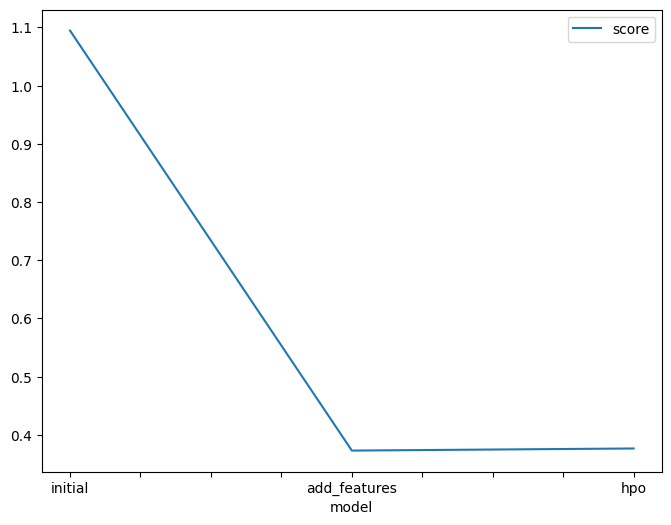

In [4]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [ 1.094642, 0.372984 , 0.376595 ]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

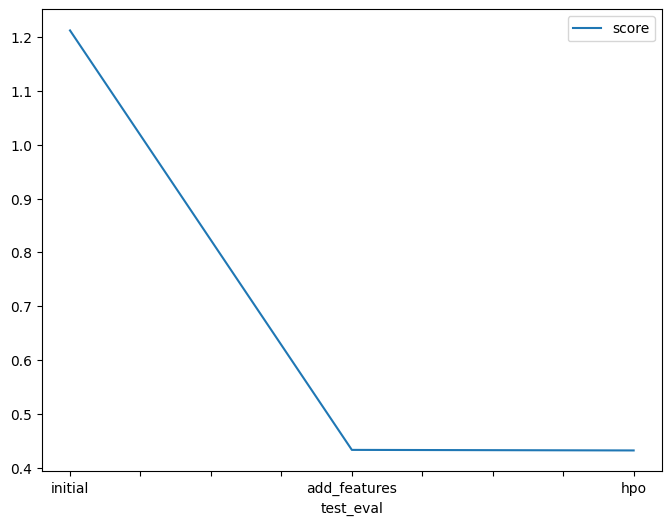

In [38]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score":[ 1.21232, 0.43297 , 0.43194 ]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [3]:
# The 3 hyperparameters we tuned with the kaggle score as the result
import pandas as pd

pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ["default", "default", "iterations=700 "],
    "hpo2": ["default", "default", "epochs=20 "],
    "hpo3": ["default", "default", " extra_trees=True"],
    "score": [ 1.21232, 0.43297 , 0.43194 ]
})

,model,hpo1,hpo2,hpo3,score
0,initial,default,default,default,1.21232
1,add_features,default,default,default,0.43297
2,hpo,iterations=700,epochs=20,extra_trees=True,0.43194
